In [1]:
import pandas as pd
from utils import load_data


# Load the data
df = load_data('TSLA_historical_data.csv', base_dir='../data/yfinance_data')

# Summary statistics for all numeric columns
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()

# List columns with >5% nulls
threshold = 0.05 * len(df)
columns_with_many_nulls = missing_values[missing_values > threshold].index.tolist()



# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on TSLA historical data.

In [2]:
import talib
# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows to show the new indicator columns
df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()

,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
3540,215.990005,237.924999,202.1838,44.886918,11.789291,15.873789,-4.084498
3541,220.250000,239.118999,203.1510,46.951389,9.353206,14.569672,-5.216466
3542,219.800003,240.238000,203.9960,46.752165,7.302106,13.116159,-5.814053
3543,232.100006,241.949000,205.1582,52.664511,6.593101,11.811547,-5.218447
3544,222.619995,242.587000,206.1138,48.220474,5.206237,10.490485,-5.284248


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on TSLA price trends.

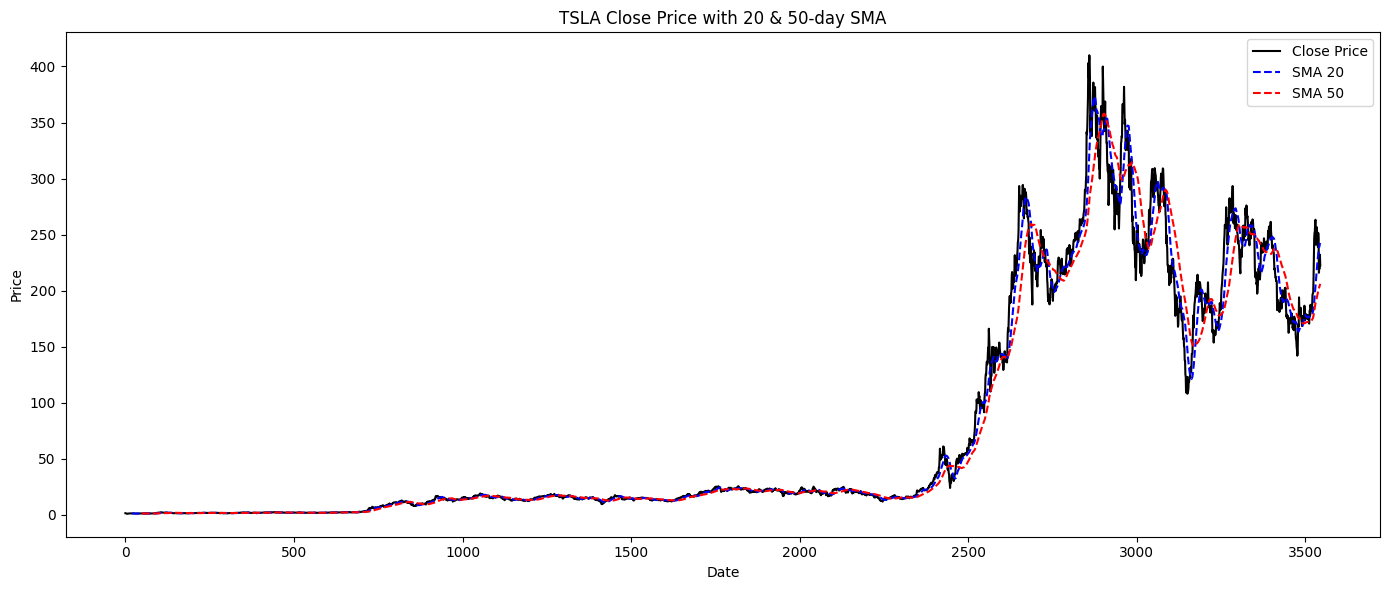

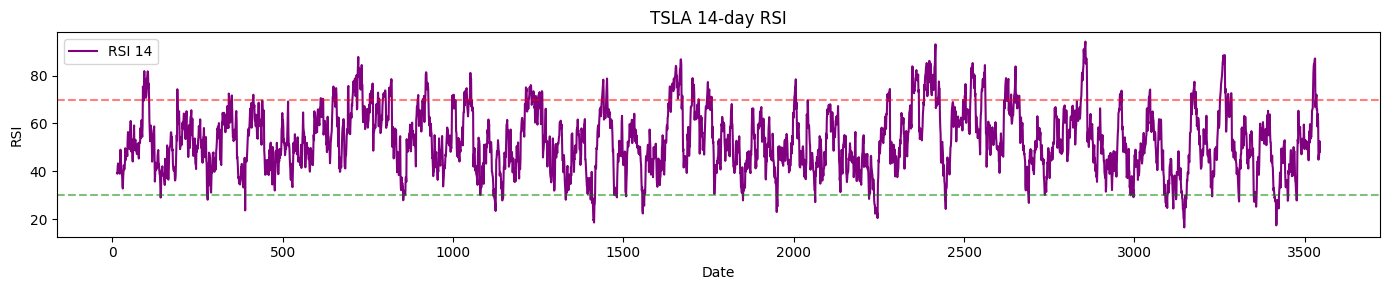

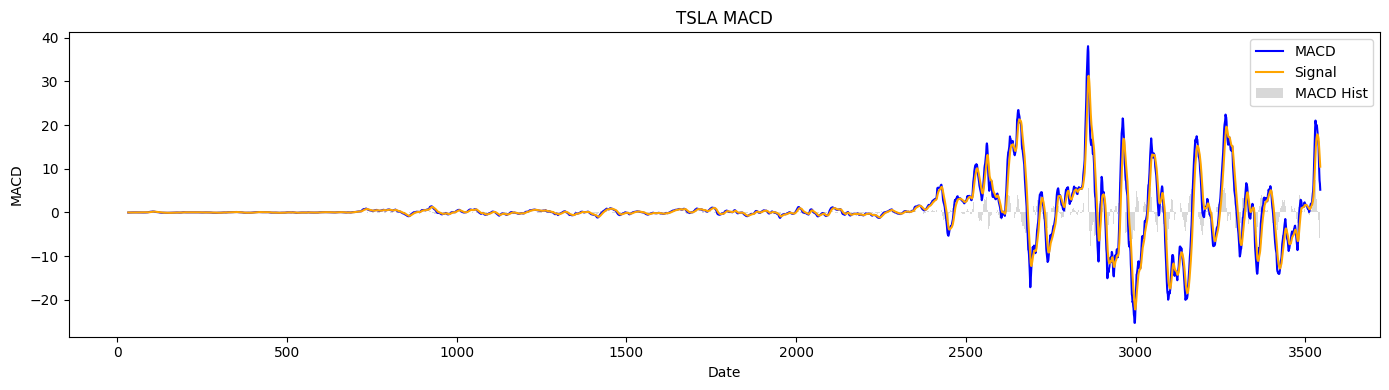

In [3]:
import matplotlib.pyplot as plt

# Plot Close price with SMA overlays
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='--')
plt.title('TSLA Close Price with 20 & 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('TSLA 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('TSLA MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()